In [30]:
import os 
import numpy as np
import pandas as pd

In [31]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

C:\Users\AM7\#Work\Machine-Learning-IEEE


In [32]:
dataset = pd.read_csv(dir_path + '\\Datasets\\Regression\\studentscores.csv')

In [36]:
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
Features =  dataset['Hours']
Labels = dataset['Scores']

In [38]:
## Without librery

#trainning data
X_train = Features.head(15)
y_train = Labels.head(15)

#test data
X_test =  Features.tail(10)
y_test = Labels.tail(10)

In [7]:
## With librery
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.4)

In [39]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15 10 15 10


# Build LinearRegression Model Without librery

In [40]:
#calculate predicted y
def predicted_y(X_train,y_train,mean_x,mean_y,X_test):
    # length of training set
    m = len(X_train)

    nume_val = 0;
    deno_val = 0;

    #formula
    """ 
        m = b1
        b = b0
        line = y = b1x + bo
        y = mx1 + mx2 + b
        b1 = slope =((x-x_mean) * (y-y_mean)) / x-x_mean^2
        b0 = intercept = y-b1x
    """

    for i in range(m):
        nume_val += (X_train[i] - mean_x) * (y_train[i] - mean_y)
        deno_val += (X_train[i] - mean_x) ** 2

    b1 = nume_val / deno_val #m
    b0 = mean_y - (b1 * mean_x) #b
    
    ## test step
    Y = b0 + b1 * X_test
    return Y

In [41]:
#calculate R2Squared for accuracy

def R2Squared(y_test,Y):
    #formula
    """ 
        r2_squared = sum((y - mean_y_test) ^ 2 / (y_test - mean_y_test) ^ 2)
        r1 = sum((y_test - mean_y_test) ^ 2)
        r2 = sum((y - mean_y_test) ^ 2)        
    """
    mean_y_test = np.mean(y_test)
    r1 = sum((y_test - mean_y_test) ** 2)
    r2 = sum((Y - mean_y_test) ** 2)
    r_sq = r2 / r1
    return r_sq

In [42]:
#mean of x and y training set
mean_x = np.mean(X_train)
mean_y = np.mean(y_train)

In [43]:
predicted_y = predicted_y(X_train, y_train, mean_x, mean_y, X_test)
r_sq = R2Squared(y_test, predicted_y)
print(r_sq)

0.8621374632318876


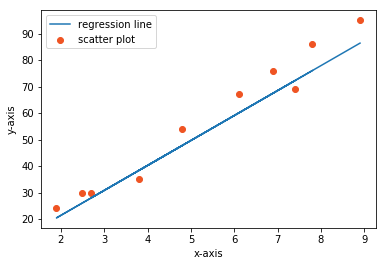

In [48]:
## when R Squared near 0 we will have fit line 
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,c='#ef5423',label="scatter plot")
plt.plot(X_test,predicted_y,label="regression line")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [ ]:
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    
    
    
    # Predicting the Test set results
    y_pred = regressor.predict(x_test)
    score = regressor.score(Labels, y_pred)